# Kaggle: Spaceship Titanic
##### Data: https://www.kaggle.com/competitions/spaceship-titanic/data

##### Dificulty: Easy
##### ***Happy Code!*** 
##### ***Víctor Núñez***

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier

# Data

In [2]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [3]:
target, PassengerId = train['Transported'], test['PassengerId']

train_0 = train.drop(['Transported','PassengerId','Name'],axis = 1)
test_0  = test.drop(['PassengerId', 'Name'], axis= 1)

data_0  = pd.concat([train_0, test_0], axis=0).reset_index(drop =  True)

In [4]:
data_0.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0


In [5]:
print(data_0.isna().sum())
print(data_0.shape)

HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
dtype: int64
(12970, 11)


# Data Processing

In [6]:
data_0.select_dtypes(np.number).head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0


In [7]:
data_0.select_dtypes(object).head()

,HomePlanet,CryoSleep,Cabin,Destination,VIP
0,Europa,False,B/0/P,TRAPPIST-1e,False
1,Earth,False,F/0/S,TRAPPIST-1e,False
2,Europa,False,A/0/S,TRAPPIST-1e,True
3,Europa,False,A/0/S,TRAPPIST-1e,False
4,Earth,False,F/1/S,TRAPPIST-1e,False


In [8]:
data_0[['CryoSleep', 'VIP']] =  data_0[['CryoSleep', 'VIP']].astype(bool)

In [9]:
#Save
data_1 = data_0.copy()

## Filling Categoricals

In [10]:
cols_na = data_1.select_dtypes(object).loc[:,data_1.isna().any()==True].columns


# Impute using the column mode
for col in cols_na:
    data_1[col] = data_1[col].fillna(data_1[col].mode()[0])

In [11]:
data_2 =  data_1.copy()

## Filling Numericals

In [12]:
cols_na =  data_2.select_dtypes(np.number).loc[:,data_2.isna().any() == True]

# Impute using mean value.
for col in cols_na:
    data_2[col] = data_2[col].fillna(data_2[col].mean())

In [13]:
data_3 = data_2.copy()

In [14]:
print(len(set(data_3.Cabin))) # So many different cabins!

9825


In [15]:
data_3['Deck'] = data_3['Cabin'].apply(lambda cabin: cabin.split('/')[0])
data_3['Num'] = data_3['Cabin'].apply(lambda cabin: cabin.split('/')[1])
data_3['Side'] = data_3['Cabin'].apply(lambda cabin: cabin.split('/')[2])

data_3.drop(['Cabin'], axis = 1, inplace =  True)

data_3['Num'] = data_3['Num'].astype(int) 

In [16]:
data_4 = data_3.copy()

In [17]:
data_4.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,F,1,S


# Encoding Categoricals

In [18]:
enc = LabelEncoder()
for column in data_4.select_dtypes(object).columns:
    data_4[column] = enc.fit_transform(data_4[column])
    
for column in data_4.select_dtypes(bool).columns:
    data_4[column] = data_4[column].astype(int)
    
target = target.astype(int)

In [19]:
data_5 =  data_4.copy()

In [20]:
data_5.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,5,0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,5,1,1


## Data Correlation 

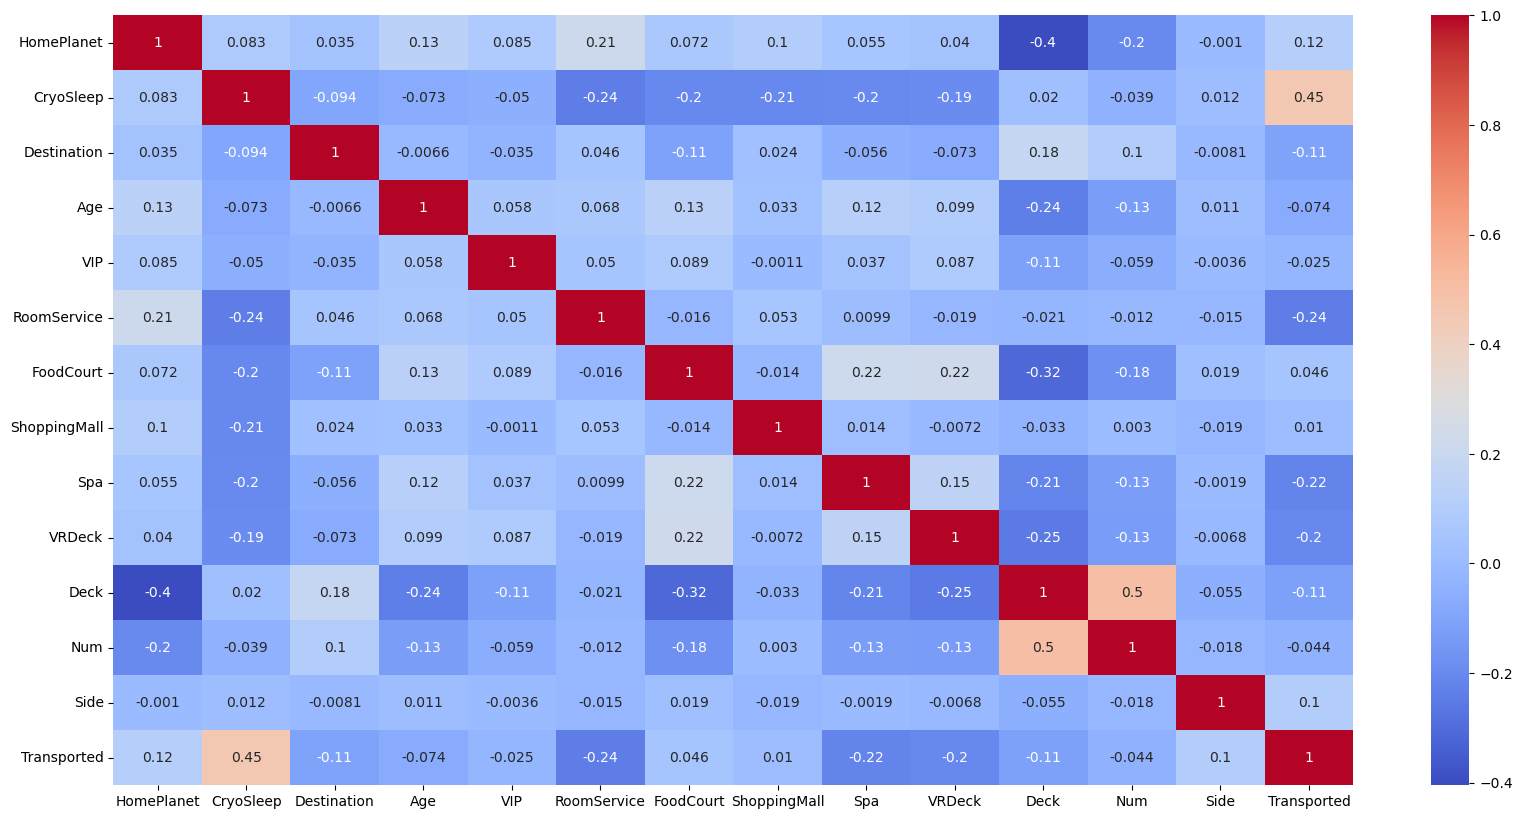

In [21]:
corr_data = pd.concat([data_5.loc[:train_0.index.max(),:],target],axis=1)

plt.figure(figsize=(20,10))
sns.heatmap(corr_data.corr(),annot=True, cmap="coolwarm")
plt.show()


In [22]:
#data_5 = data_5.drop(["FoodCourt", "VIP", "Age", "Num", "ShoppingMall"],axis =  1)

In [23]:
data_6 =  data_5.copy()

# Final Split

In [24]:
train_final = data_6.loc[:train_0.index.max(),:].copy()
test_final  = data_6.loc[train_0.index.max()+1:,:].reset_index(drop = True)

In [25]:
train_final.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,5,0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,5,1,1


# Model: Decision Tree Classifier

## Hyper-Parameter Search

In [26]:
param_grid = {'criterion': ['gini','entropy'],
              'max_depth':[1,2,3,4,5,6],
              'max_features': [2,4,6,8],
              }

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring="accuracy", cv=5)
grid.fit(train_final, target)
print("Best score = %f, Best parameters = %s" % (1. - grid.best_score_, grid.best_params_))


Best score = 0.234668, Best parameters = {'criterion': 'gini', 'max_depth': 6, 'max_features': 6}


In [27]:
#Here, I manually adjusted the parameters slightly in search of the lowest Mean Squared Error (MSE)

model_dt =  DecisionTreeClassifier(criterion= 'gini', max_features=1 ,max_depth=1, random_state = 42)
model_dt.fit(train_final, target)

y_pred = model_dt.predict(test_final)

mse = mean_squared_error(sample_submission.Transported.astype(int), y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.04629413140051438


In [28]:
final_predicttions = y_pred.astype(bool)

submission = pd.concat([PassengerId, pd.Series(final_predicttions, name = 'Transported')], axis= 1)
submission.to_csv('./submission_predictions.csv',index=False, header= True)


In [29]:
submission.head(10)

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
5,0027_01,False
6,0029_01,False
7,0032_01,False
8,0032_02,False
9,0033_01,False
